### Imports and Utility-Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%run ./library/traffic_simulation.py
%run ../utils/helper.py

In [2]:
def draw_lines_based_on_points_on_plot(points, ax=None, line_color='blue', line_size=0.5):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(points[:, 0], points[:, 1], color=line_color, linewidth=line_size)

    return ax

def draw_points_on_plot(point_sequence, ax, line_color, point_size=1):
    x, y = zip(*point_sequence)
    ax.scatter(x, y, color=line_color, s=point_size)
    return ax

In [3]:
def visualize_line_change_by_theta(line, theta):
    new_endpoint = calculate_rotated_line(line[0], line[1], theta)
    new_line = [line[1], new_endpoint]
    
    plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-', label='Original Line')

    # Plot the new line
    plt.plot([new_line[0][0], new_line[1][0]], [new_line[0][1], new_line[1][1]], 'b-', label='New Line')
    
    # Plotting points for clarity
    plt.scatter(*line[0], color='red', zorder=5)
    plt.scatter(*line[1], color='red', zorder=5)
    plt.scatter(*new_line[0], color='blue', zorder=5)
    plt.scatter(*new_line[1], color='blue', zorder=5)
    
    # Labeling the points
    plt.text(line[0][0], line[0][1], 'A', fontsize=12, ha='right')
    plt.text(line[1][0], line[1][1], 'B', fontsize=12, ha='right')
    plt.text(new_line[1][0], new_line[1][1], "B'", fontsize=12, ha='right')
    
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Visualizing Line Transformation')
    plt.show()


In [4]:
# a bit dirty. A good way to redraw
def redraw_initial_sketch():
    fig, ax = plt.subplots()
    ax.set_xlim(-30, 80)
    ax.set_ylim(-20, 70)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    
    angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[0, 5], [1, 5]]
    point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')
    
    angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
    rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
    init_point_sequence = [[-0.5, 1], [0.5, 1]]
    point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
    ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

    return fig, ax

### Theory


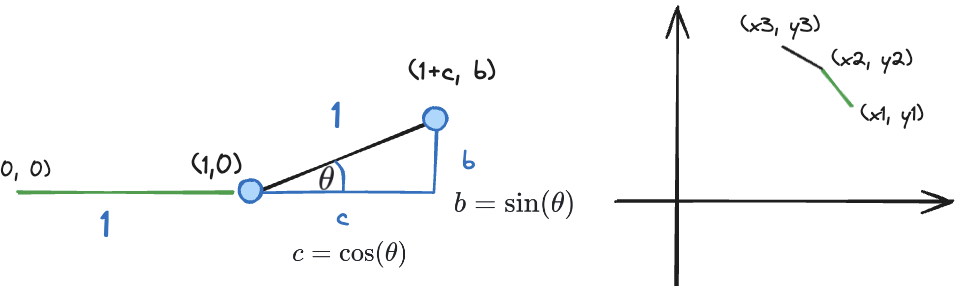
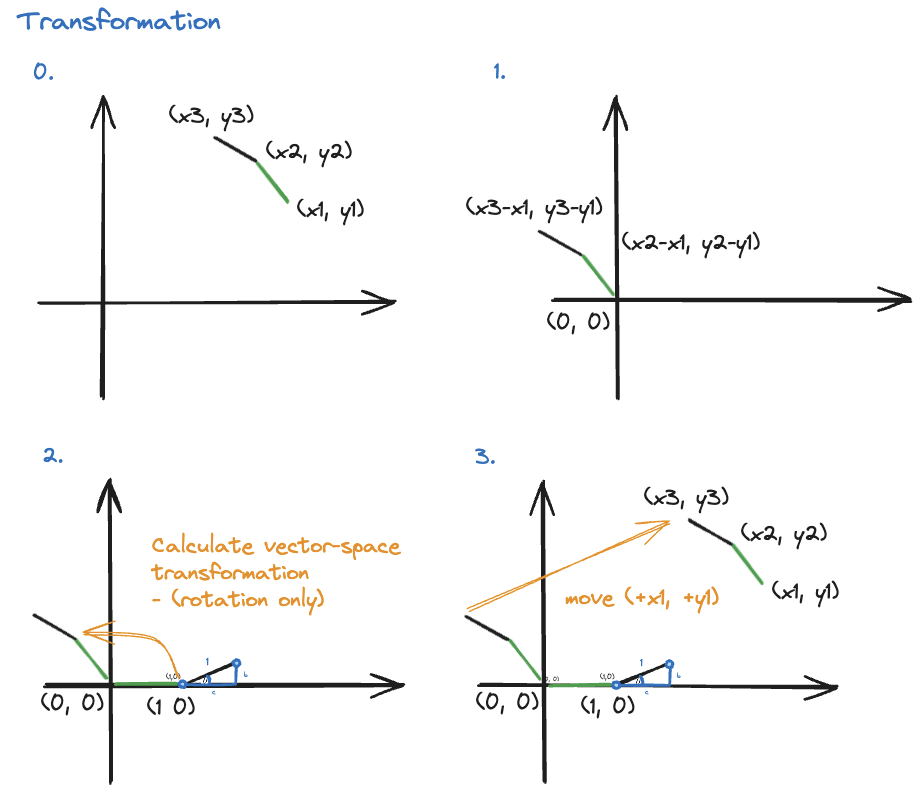

In [5]:
html(calculate_rotated_line)

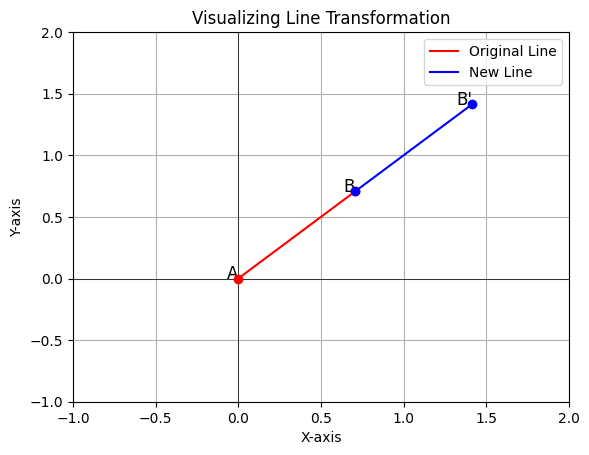

In [6]:
line = [[0, 0], [0.7071, 0.7071]]
theta = np.radians(0)
visualize_line_change_by_theta(line, theta)

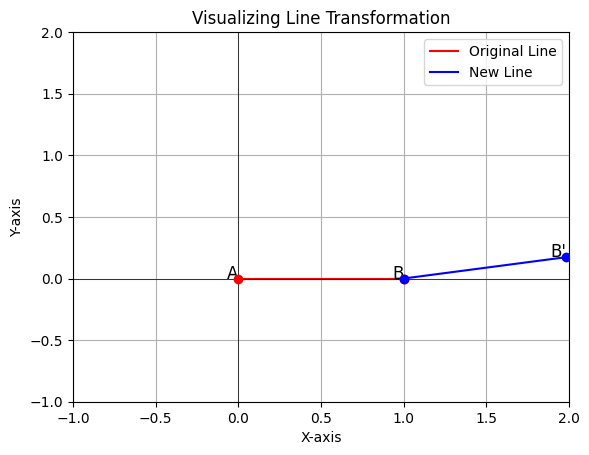

In [7]:
line = [[0, 0], [1, 0]]
theta = np.radians(10)
visualize_line_change_by_theta(line, theta)

### Streets-Building

In [8]:
def calc_roation_angles_from_tuple(angle_count_tuples):
    return np.radians(np.repeat([angle for angle, count in angle_count_tuples], [count for angle, count in angle_count_tuples]))

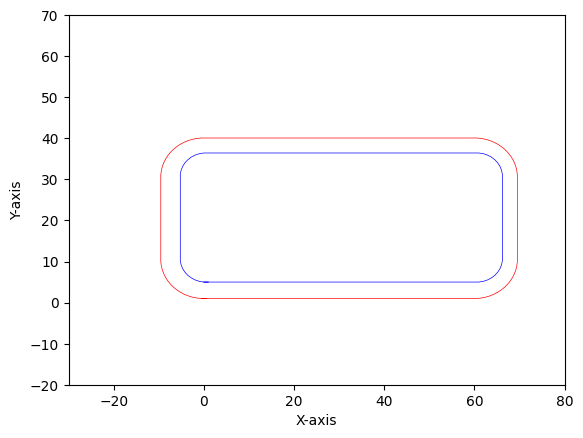

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(-30, 80)
ax.set_ylim(-20, 70)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

angle_count_tuples = [[0, 60], [10, 9], [0, 20], [10, 9], [0, 60], [10, 9], [0, 20], [10, 9]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[0, 5], [1, 5]]
point_sequence_one = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_one, ax, line_color='blue')

angle_count_tuples = [[0, 60], [6, 15], [0, 20], [6, 15], [0, 60], [6, 15], [0, 20], [6, 15]]
rotation_angles = calc_roation_angles_from_tuple(angle_count_tuples)
init_point_sequence = [[-0.5, 1], [0.5, 1]]
point_sequence_two = generate_point_sequence(init_point_sequence, rotation_angles)
ax = draw_lines_based_on_points_on_plot(point_sequence_two, ax, line_color='red')

plt.show()

### Car-Simulation

In [10]:
scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)
time_scale = 5

def update(i):
    global ax, scatter_one, scatter_two, time_scale, point_sequence_one, point_sequence_two
    
    points_indices_one = np.mod(time_scale * np.array([2*i, i+20, i+50]), point_sequence_one.shape[0])
    points_indices_two = np.mod(time_scale * np.array([i+5, i+30, i+50]), point_sequence_two.shape[0])
    
    points_one = np.array([point_sequence_one[index] for index in points_indices_one])
    points_two = np.array([point_sequence_two[index] for index in points_indices_two])
    
    scatter_one.set_offsets(points_one)
    scatter_two.set_offsets(points_two)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

In [11]:
N = 1000000
time_scale = 1
indices = np.arange(N)

indices_1 = np.mod(time_scale * np.array([2*indices, indices+20, indices+50]), point_sequence_one.shape[0])
indices_2 = np.mod(time_scale * np.array([indices+5, indices+30, indices+50]), point_sequence_two.shape[0])

points_one = point_sequence_one[indices_1]
points_two = point_sequence_two[indices_2]

#### Add cars to lanes, Respect other cars, Change lane

In [12]:
def index_order_for_cars_in_lanes(car_specifications, lanes):
    lane_indices = np.array([car_specifications[car_specifications[:, 1] == i, 2].astype(int) for i in lanes])
    car_indicies = np.array([car_specifications[car_specifications[:, 1] == i, 0].astype(int) for i in lanes])
    return np.take_along_axis(car_indicies, np.argsort(lane_indices), axis=1)

In [13]:
def update_lane_indicies(car_specifications, lane_num_tracks):
    car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
    return car_specifications

In [14]:
# def update_lane_indicies_no_overtake(car_specifications, lane_num_tracks):
#     car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
#     return car_specifications

In [15]:
def update_lane_indicies_with_overtake(car_specifications, lane_num_tracks, lanes):
    index_order = index_order_for_cars_in_lanes(car_specifications, lanes)
    car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
    updated_index_order = index_order_for_cars_in_lanes(car_specifications, lanes)

    
    # on collison, do not overtake
    
    return car_specifications

In [16]:
car_lane_zero = point_sequence_one
car_lane_one = point_sequence_two

lanes = np.array([0, 1])
lane_num_tracks = np.array([point_sequence_one.shape[0], point_sequence_two.shape[0]])

# car consists of id, driving_lane, point_index, speed and chance of swapping lane if waiting behind other car
car_specifications = np.array([
    [1, 0, 1, 3, 0.01], [2, 0, 20, 10, 0.01], [3, 0, 30, 3, 0.01], [4, 1, 5, 5, 0.01], [5, 1, 10, 7, 0.01], [6, 1, 25, 10, 0.01]
])

In [17]:
index_order = index_order_for_cars_in_lanes(car_specifications, lanes)
car_specifications[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])

updated_index_order = index_order_for_cars_in_lanes(car_specifications, lanes)
index_order, updated_index_order

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [18]:
car_specification = np.array([[10, 20, 30], [20, 30, 40]])
new_specification = np.array([[30, 30, 35], [35, 45, 50]])

index_order = np.array([[1, 2, 3], [4, 5, 6]])
updated_index_order = np.array([[3, 2, 1], [5, 4, 6]])

# cars that want to over-take have to be at-least ahead of one other index in the update
car_ids_that_want_to_overtake = ...
# [1, 2, 4]

In [19]:
a = np.array([[1, 2, 3], [4, 5, 6]]) # we can assume that a is always sorted
b = np.array([[2, 3, 1], [6, 4, 5]])

# overtaken: [1, 4, 5]
b - np.sort(b)

array([[ 1,  1, -2],
       [ 2, -1, -1]])

In [20]:
index_order_for_cars_in_lanes(car_specifications, lanes)

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
a = np.array([[1, 2, 3], [4, 5, 6]]) # we can assume that a is always sorted
b = np.array([[2, 3, 1], [6, 4, 5]])

# Find all elements that have overtaken
has_overtaken = ((b - np.sort(b)) < 0)

# Problem, we do not always have the matrix of sort a, b

In [127]:
# car consists of id, driving_lane, point_index, speed and chance of swapping lane if waiting behind other car
lanes = np.array([0, 1])
car_specifications = np.array([
    [1, 0, 1, 10, 0.01], [2, 0, 2, 0, 0.01], [3, 0, 3, 0, 0.01], [4, 1, 1, 10, 0.01], [5, 1, 2, 10, 0.01], [6, 1, 3, 0, 0.01]
])

# index_order = index_order_for_cars_in_lanes(car_specifications, lanes)
car_update = np.copy(car_specifications)
car_update[:, 2] = np.mod(car_specifications[:, 3] + car_specifications[:, 2], lane_num_tracks[car_specifications[:, 1].astype(int)])
# updated_index_order = index_order_for_cars_in_lanes(car_specifications, lanes)

# a holds updated-cars: car-lane, lane-index, car-index
a = np.vstack((car_update[:, 1], car_update[:, 2], car_update[:, 0] - 1)).astype(int).T

# lane_changes = has_overtaken.astype(int) * 

# Give them a chance to change lane - any car that colides will be put back

# adjust the scale, such that every car has it's unique index per lane
# a, b, car_update
a, car_update

(array([[ 0, 11,  0],
        [ 0,  2,  1],
        [ 0,  3,  2],
        [ 1, 11,  3],
        [ 1, 12,  4],
        [ 1,  3,  5]]),
 array([[1.0e+00, 0.0e+00, 1.1e+01, 1.0e+01, 1.0e-02],
        [2.0e+00, 0.0e+00, 2.0e+00, 0.0e+00, 1.0e-02],
        [3.0e+00, 0.0e+00, 3.0e+00, 0.0e+00, 1.0e-02],
        [4.0e+00, 1.0e+00, 1.1e+01, 1.0e+01, 1.0e-02],
        [5.0e+00, 1.0e+00, 1.2e+01, 1.0e+01, 1.0e-02],
        [6.0e+00, 1.0e+00, 3.0e+00, 0.0e+00, 1.0e-02]]))

In [128]:
sorted_indices = np.lexsort((a[:, 1], a[:, 0]))
sorted_array = a[sorted_indices]
sorted_array

array([[ 0,  2,  1],
       [ 0,  3,  2],
       [ 0, 11,  0],
       [ 1,  3,  5],
       [ 1, 11,  3],
       [ 1, 12,  4]])

In [142]:
c = np.copy(a)
# column 1 encodes which cars want to change the lane
c[:, 1] = ((c[:,1] - sorted_array[:, 1]) < 0).astype(int)
# column 1 encodes if the car will attempt a lane-change (1) or not (0)
c[:, 1] = (c[:, 1] * car_specifications[sorted_array[:, 2], 4] >=  np.random.rand(c.shape[0])).astype(int)
c

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 2],
       [1, 0, 3],
       [1, 0, 4],
       [1, 0, 5]])

In [139]:
# update lanes


array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [ ]:
## Lane Changer
a = lane_and_update_tuple
b = np.sort(lane_and_update_tuple, axis=0)
a[:, 0] = 0

c =  b - a
probability_lane_change = (c[:, 1] < 0).astype(int) * car_specifications[:, 4]
lane_change = probability_lane_change > np.random.rand(probability_lane_change.shape[0]).astype(int)
c, lane_change

In [113]:
lane_num_tracks[car_specifications[:, 1].astype(int)]

array([198, 198, 198, 222, 222, 222])

In [48]:
index_order

array([[1, 2, 3],
       [4, 5, 6]])

In [102]:
import numpy as np

lane_and_update_tuple = np.array([
    [1., 2],
    [0., 2],
    [0., 11],
    [0., 3],
    [1., 0],
    [1., 3]
])

transposed = lane_and_update_tuple.T
sorted_indices = np.lexsort(transposed)
sorted_array = lane_and_update_tuple[sorted_indices]

print(sorted_array)

[[ 1.  0.]
 [ 0.  2.]
 [ 1.  2.]
 [ 0.  3.]
 [ 1.  3.]
 [ 0. 11.]]


In [110]:
lane_and_update_tuple = np.array([[ 0., 11.,  1.],
       [ 0.,  2.,  2.],
       [ 1.,  3.,  6.],
       [ 1., 11.,  4.],
       [ 0.,  3.,  3.],
       [ 1., 12.,  5.]])

transposed = lane_and_update_tuple.T
sorted_indices = np.lexsort(transposed)
sorted_array = lane_and_update_tuple[sorted_indices]
sorted_array

array([[ 0., 11.,  1.],
       [ 0.,  2.,  2.],
       [ 0.,  3.,  3.],
       [ 1., 11.,  4.],
       [ 1., 12.,  5.],
       [ 1.,  3.,  6.]])

In [112]:
sorted_indices = np.lexsort((lane_and_update_tuple[:, 1], lane_and_update_tuple[:, 0]))
sorted_array = lane_and_update_tuple[sorted_indices]
print(sorted_array)

[[ 0.  2.  2.]
 [ 0.  3.  3.]
 [ 0. 11.  1.]
 [ 1.  3.  6.]
 [ 1. 11.  4.]
 [ 1. 12.  5.]]


In [104]:
transposed

array([[ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 2.,  2., 11.,  3.,  0.,  3.]])

In [105]:
np.lexsort(transposed)

array([4, 1, 0, 3, 5, 2])

In [92]:
lane_and_update_tuple = np.array([[ 0., 11],
       [ 0.,  2],
       [ 0.,  3],
       [ 1., 0],
       [ 1., 2],
       [ 1.,  3]])

sorted_array = lane_and_update_tuple[:, np.lexsort((lane_and_update_tuple[0,:], lane_and_update_tuple[1,:]))]
sorted_array

array([[ 0., 11.],
       [ 0.,  2.],
       [ 0.,  3.],
       [ 1.,  0.],
       [ 1.,  2.],
       [ 1.,  3.]])

In [86]:
np.lexsort((lane_and_update_tuple[1, :], lane_and_update_tuple[0, :]))

array([0, 1])

In [80]:
lane_and_update_tuple = np.array([[ 0., 11.,  1.],
       [ 0.,  2.,  2.],
       [ 0.,  3.,  3.],
       [ 1., 11.,  4.],
       [ 1., 12.,  5.],
       [ 1.,  3.,  6.]])

np.sort(lane_and_update_tuple)

array([[ 0.,  1., 11.],
       [ 0.,  2.,  2.],
       [ 0.,  3.,  3.],
       [ 1.,  4., 11.],
       [ 1.,  5., 12.],
       [ 1.,  3.,  6.]])

In [71]:
lane_and_update_tuple = np.column_stack((car_specifications[:, 1].astype(int), b, car_specifications[:, 0]))
lane_and_update_tuple

array([[ 0., 11.,  1.],
       [ 0.,  2.,  2.],
       [ 0.,  3.,  3.],
       [ 1., 11.,  4.],
       [ 1., 12.,  5.],
       [ 1.,  3.,  6.]])

In [82]:
a = lane_and_update_tuple
b = np.sort(lane_and_update_tuple, axis=0)
a[:, 0] = 0

c =  b - a
probability_lane_change = (c[:, 1] < 0).astype(int) * car_specifications[:, 4]
lane_change = probability_lane_change > np.random.rand(probability_lane_change.shape[0]).astype(int)
c, lane_change

(array([[  0., -11.],
        [  0.,   0.],
        [  0.,  -1.],
        [  1.,   3.],
        [  1.,   1.],
        [  1.,   8.]]),
 array([ True, False,  True, False, False, False]))

In [59]:
np.mod(car_specifications[:, 1] + , lanes.shape[0])

SyntaxError: invalid syntax (4093926207.py, line 1)

2

In [27]:
ordered_matrix = np.array([a[i][matrix_order[i]] for i in range(a.shape[0])])
ordered_matrix

NameError: name 'matrix_order' is not defined

In [ ]:
np.where((new_specification > car_specification) & (updated_index_order < index_order))[-1] + 1

In [ ]:
fig, ax = redraw_initial_sketch()

scatter_one = ax.scatter([], [], c='green', s=10)
scatter_two = ax.scatter([], [], c='orange', s=10)

def update(i):
    global ax, scatter_one, scatter_two, point_sequence_one, point_sequence_two, car_specifications
    
    points_one_indicies = car_specifications[car_specifications[:, 1].astype(int) == 0][:, 2].astype(int)
    points_two_indicies = car_specifications[car_specifications[:, 1].astype(int) == 1][:, 2].astype(int)
    
    points_one = point_sequence_one[points_one_indicies]
    points_two = point_sequence_two[points_two_indicies]
    
    scatter_one.set_offsets(points_one)
    scatter_two.set_offsets(points_two)

    lane_num_tracks = np.array([point_sequence_one.shape[0], point_sequence_two.shape[0]])
    car_specifications = update_lane_indicies(car_specifications, lane_num_tracks)
    # print(points_one)
    
    return scatter_one, scatter_two

ani = FuncAnimation(fig, update, frames=range(200), repeat=True, blit=True)
plt.close(fig)
HTML(ani.to_html5_video())

### Recording form fixed-car

### Recording from

### Replay from Recording